In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

file_path = '/content/drive/My Drive/creditcard.csv'
dataFrame = pd.read_csv(file_path)

# Prepare data
X = dataFrame.drop('Class', axis=1)
y = dataFrame['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_tree.predict(X_test)
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict and evaluate
y_pred = lda.predict(X_test)
print("Linear Discriminant Analysis (LDA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict and evaluate
y_pred = naive_bayes.predict(X_test)
print("Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))



Logistic Regression:
Accuracy: 0.9991748885221726
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Classifier:
Accuracy: 0.9991397773954567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.73      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Linear Discriminant Analysis (LDA):
Accuracy: 0.9993679997191109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


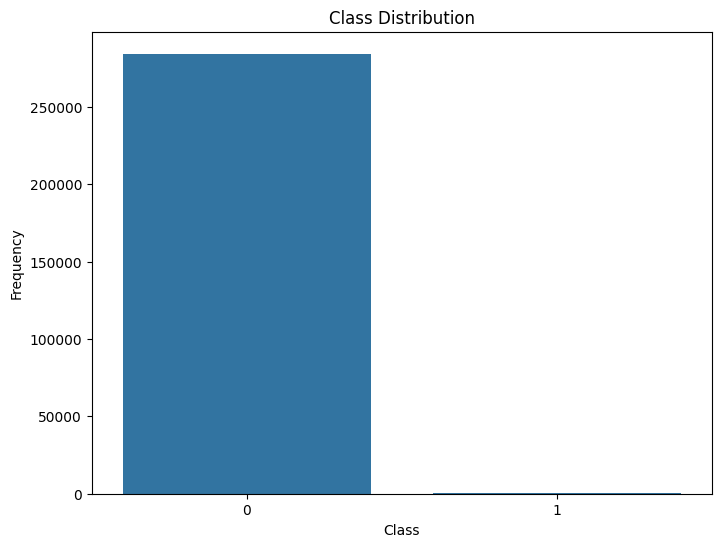

Selected Features with Logistic Regression: Index(['V4', 'V8', 'V9', 'V10', 'V12', 'V13', 'V14', 'V16', 'V21', 'V22'], dtype='object')

Baseline Performance on Imbalanced Data:
Logistic Regression - Mean Accuracy: 0.9992483914338584 ± 0.00016604670192127722
Decision Tree - Mean Accuracy: 0.999105751777264 ± 7.278213040786824e-05
K-Nearest Neighbors - Mean Accuracy: 0.9995391605746585 ± 8.913945692226629e-05
Linear Discriminant Analysis - Mean Accuracy: 0.999429436557984 ± 5.3192078519010645e-05
Naive Bayes - Mean Accuracy: 0.9869154452477431 ± 0.0005129364445887705

Class distribution after SMOTE resampling:
Class
0    181961
1    181961
Name: count, dtype: int64


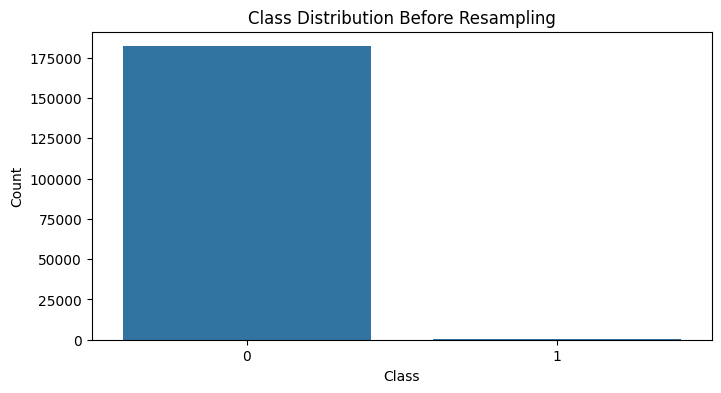

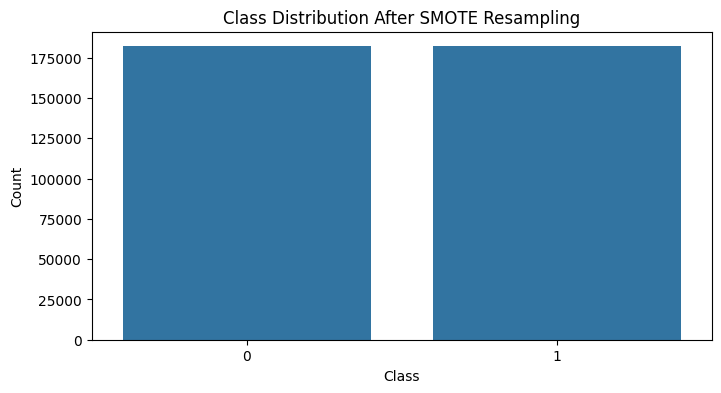


Logistic Regression with SMOTE

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.90      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC-AUC: 0.9744
PR-AUC: 0.7311

Decision Tree with SMOTE

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.84      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.92      0.76     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9172
PR-AUC: 0.3136

K-Nearest Neighbors with SMOTE

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0 

In [5]:

# Check class distribution
class_distribution = dataFrame['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=dataFrame)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Prepare data
X = dataFrame.drop('Class', axis=1)
y = dataFrame['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Feature Selection using RFE with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("Selected Features with Logistic Regression:", selected_features)

# Prepare the dataset with selected features
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB()
}

# Perform cross-validation and record metrics
print("\nBaseline Performance on Imbalanced Data:")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean()} ± {scores.std()}")

# Define resampling techniques
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Check class distribution after resampling
print("\nClass distribution after SMOTE resampling:")
print(pd.Series(y_train_smote).value_counts())

# Plot class distributions before and after resampling
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Plot class distributions before and after resampling
plot_class_distribution(y_train, "Class Distribution Before Resampling")
plot_class_distribution(pd.Series(y_train_smote), "Class Distribution After SMOTE Resampling")

# Define the resampling pipeline
for name, clf in classifiers.items():
    print(f"\n{name} with SMOTE")

    # Create a new pipeline with the classifier
    resampled_pipeline = Pipeline([
        ('classifier', clf)
    ])

    # Train classifier on the resampled dataset
    resampled_pipeline.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = resampled_pipeline.predict(X_test_selected)
    y_pred_proba = resampled_pipeline.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute and print ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Compute and print PR-AUC
    pr_auc = average_precision_score(y_test, y_pred_proba)
    print(f"PR-AUC: {pr_auc:.4f}")
